## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

In [1]:
# LECTURE 17: Measure of the cosmological relationship between distance and redshift. 
# At high redshifts, this is done with Type Ia Supernova, which are standardizable candles.
# Universe is expanding and accellerating. 

# The distance modulus μ = m − M is the difference between the apparent magnitude m and the absolute magnitude M of an astronomical object

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

/home/alessandrangeloni/VirtualEnv/lib/python3.12/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_18592/2156045600.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
/tmp/ipykernel_18592/2156045600.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Distance modulus ($\mu$) vs Redshift (z)")


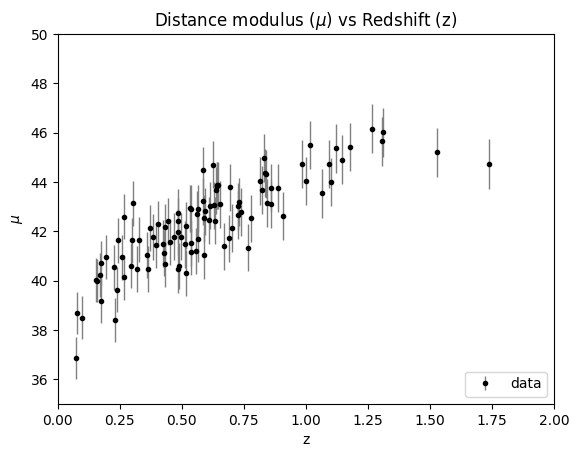

In [ ]:
# Data simulation
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # FIXED VALUES

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$") 
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title(r"Distance modulus ($\mu$) vs Redshift (z)")
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_18592/615397380.py:28: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")
/tmp/ipykernel_18592/615397380.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Distance modulus ($\mu$) vs Redshift (z) - LINEAR REGRESSION")



LINEAR REGRESSION (no errors): intercept = 39.56505554722625, coefficient = [4.64711848]
LINEAR REGRESSION (with errors): intercept = 39.60456481105869, coefficient = [4.5911933]


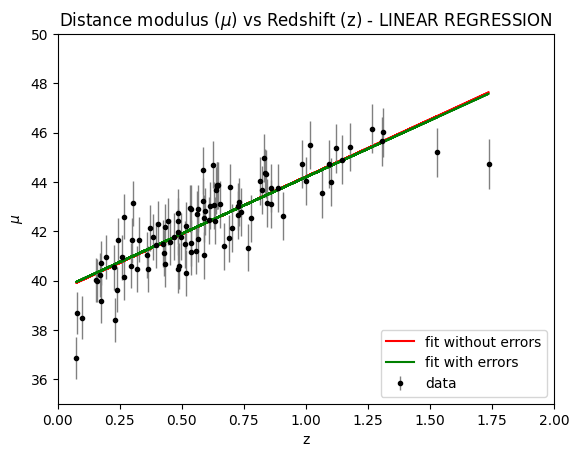

In [4]:
# Fit data with linear regression 
z_sample = z_sample.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(z_sample, mu_sample)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print()
print(f"LINEAR REGRESSION (no errors): intercept = {theta0}, coefficient = {theta1}")

Y1 = lin_reg.predict(z_sample)
plt.plot(z_sample, Y1, color='red', label = 'fit without errors') 

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

# Linear regression with errors
lin_reg2 = LinearRegression()
lin_reg2.fit(z_sample, mu_sample, dmu)

print(f"LINEAR REGRESSION (with errors): intercept = {lin_reg2.intercept_}, coefficient = {lin_reg2.coef_}")

Y2 = lin_reg2.predict(z_sample)
plt.plot(z_sample, Y2, color='green', label = 'fit with errors') 

plt.xlabel("z")
plt.ylabel("$\mu$") 
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.title("Distance modulus ($\mu$) vs Redshift (z) - LINEAR REGRESSION")
plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_18592/3600017641.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("$\mu$")


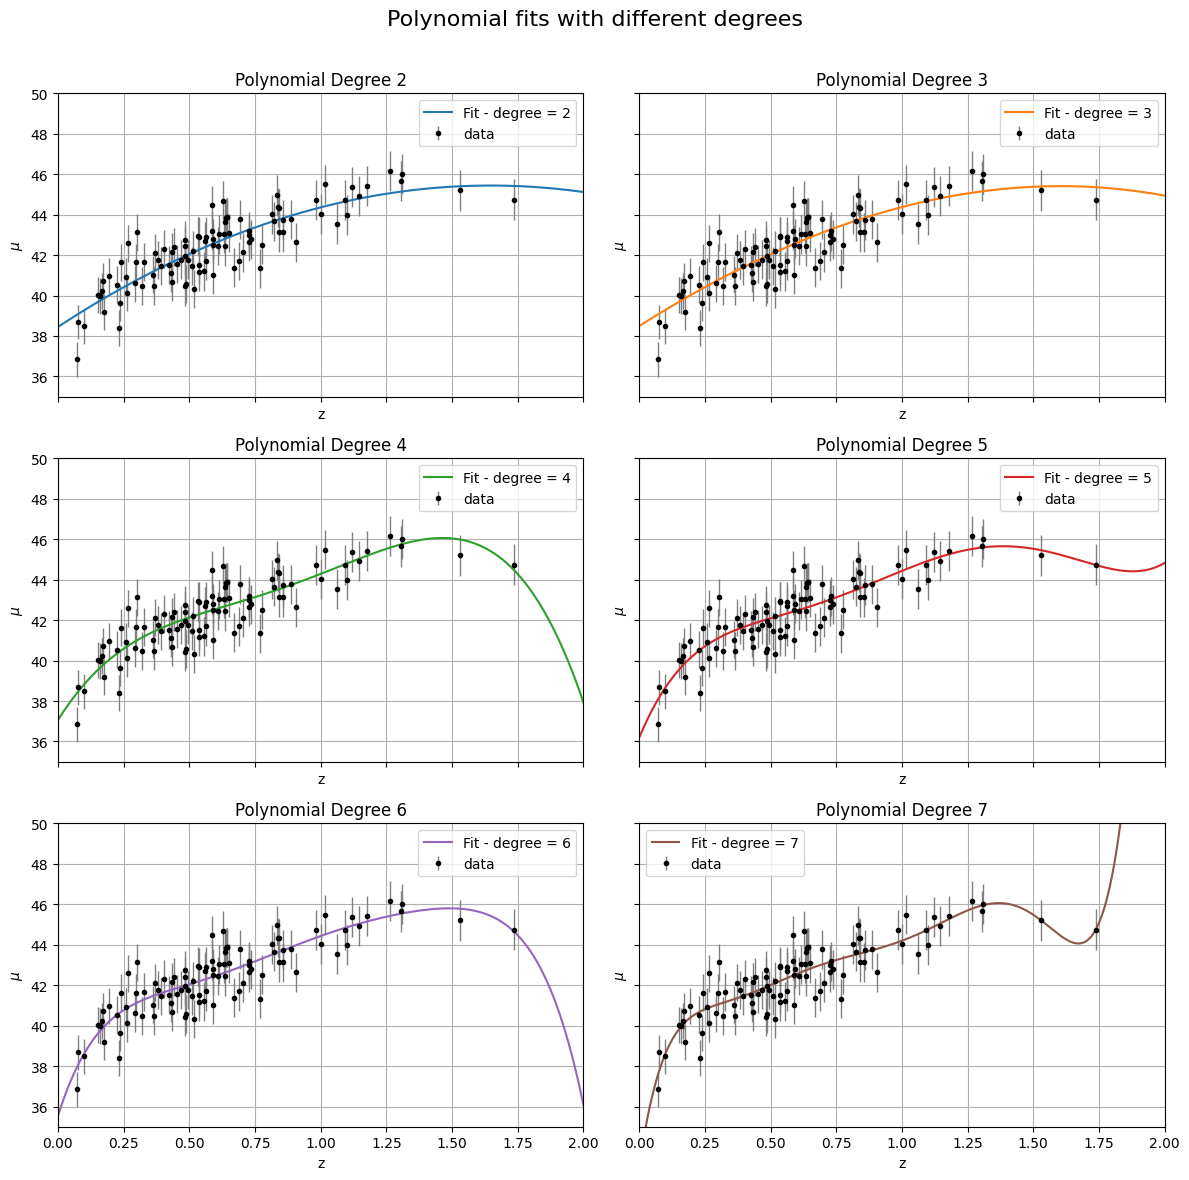

In [5]:
# Fit data with polynomial regression in different cases
degree = [2, 3, 4, 5, 6, 7]
z_sample_curve = np.linspace(0, 2, 1000).reshape(-1, 1)

colors = plt.cm.tab10.colors 

# Setup subplot
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.ravel()

for i, d in enumerate(degree): 
    model = PolynomialRegression(d)
    model.fit(z_sample, mu_sample)
    y = model.predict(z_sample_curve)
    
    color = colors[i % len(colors)] 

    ax = axes[i]
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')
    ax.plot(z_sample_curve, y, color=color, label=f'Fit - degree = {d}')
    ax.set_title(f'Polynomial Degree {d}')
    ax.set_xlim(0, 2)
    ax.set_ylim(35, 50)
    ax.set_xlabel("z")
    ax.set_ylabel("$\mu$")
    ax.grid(True)
    ax.legend()

plt.suptitle("Polynomial fits with different degrees", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

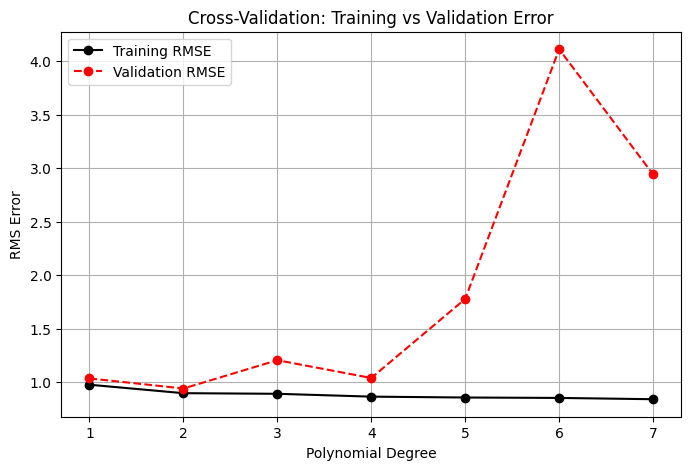

In [6]:
# Cross validation to determine the best fit, overfitting and underfitting
test_deg = np.array([1, 2, 3, 4, 5, 6, 7])

# squared mean errors on the sets for each degree tested
training_err = np.zeros(len(test_deg))
crossval_err = np.zeros(len(test_deg))

# Split the data into training and validation sets (folds) 
KF = KFold(n_splits=5, shuffle=True, random_state=42) # data are shuffled to prevent bias

for i, d in enumerate(test_deg):
    train_errors = []
    val_errors = []
    
    for train_index, val_index in KF.split(z_sample):
        x_train, x_val = z_sample[train_index], z_sample[val_index]
        y_train, y_val = mu_sample[train_index], mu_sample[val_index]

        # Regressione polinomiale
        model = PolynomialRegression(degree=d)
        model.fit(x_train, y_train)
        
        y_train_pred = model.predict(x_train)
        y_val_pred = model.predict(x_val)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    # error on all the folds
    training_err[i] = np.mean(train_errors) 
    crossval_err[i] = np.mean(val_errors)

plt.figure(figsize=(8, 5))
plt.plot(test_deg, training_err, '-o', label='Training RMSE', color='black')
plt.plot(test_deg, crossval_err, '--o', label='Validation RMSE', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.title('Cross-Validation: Training vs Validation Error')
plt.legend()
plt.grid(True)
plt.show()

# UNDERFITTING -> both validation and training errors are high
# OVERFITTING -> training error is low, validation error is high
# BEST FIT -> validation error is the minimum, training and validation errors are similar  